<a href="https://colab.research.google.com/github/yeticheese/NMA_2024_Zealous_Sedum_CN/blob/main/notebooks%5CA_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install requests
!pip install seaborn
!pip install scikit-learn


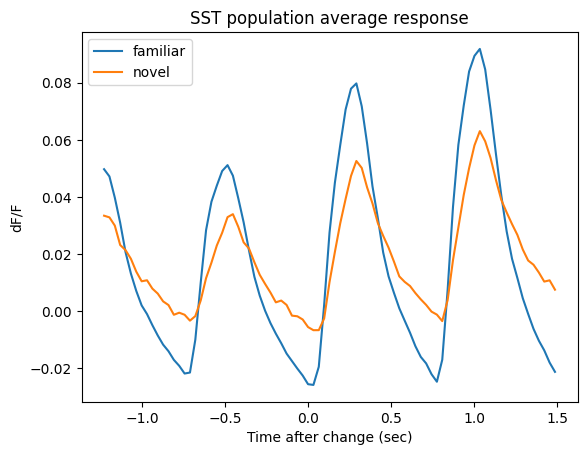

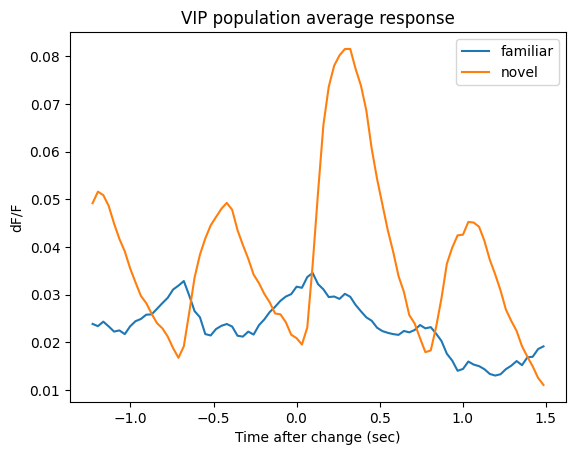

In [2]:
#Steps to Generate Plots for VIP and SST Neurons' Responses to Novel Images
#Install Dependencies and make sure you have the necessary Python packages installed!

#Download and Load the Dataset:

import pandas as pd
import requests
import os

# Download dataset if not already available
fname = "allen_visual_behavior_2p_change_detection_familiar_novel_image_sets.parquet"
url = "https://ndownloader.figshare.com/files/28470255"

if not os.path.isfile(fname):
    try:
        r = requests.get(url)
        r.raise_for_status()
        with open(fname, "wb") as fid:
            fid.write(r.content)
    except requests.RequestException as e:
        print(f"Error downloading the dataset: {e}")

# Load the dataset
data = pd.read_parquet(fname)


# Filter data for SST and VIP neurons
sst_data = data[data.cre_line == 'Sst-IRES-Cre']
vip_data = data[data.cre_line == 'Vip-IRES-Cre']

# Further filter to get trials where the image identity changed
sst_change_data = sst_data[sst_data.is_change == True]
vip_change_data = vip_data[vip_data.is_change == True]


#Plot Population Average Responses:

import numpy as np
import matplotlib.pyplot as plt

# Plot SST population average response for familiar and novel images
timestamps = sst_change_data.trace_timestamps.values[0]
for exposure_level in sst_change_data.exposure_level.unique():
    traces = np.stack(sst_change_data[sst_change_data.exposure_level == exposure_level].trace.values)
    plt.plot(timestamps, np.mean(traces, axis=0), label=exposure_level)
plt.title('SST population average response')
plt.xlabel('Time after change (sec)')
plt.ylabel('dF/F')
plt.legend()
plt.show()

# Plot VIP population average response for familiar and novel images
timestamps = vip_change_data.trace_timestamps.values[0]
for exposure_level in vip_change_data.exposure_level.unique():
    traces = np.stack(vip_change_data[vip_change_data.exposure_level == exposure_level].trace.values)
    plt.plot(timestamps, np.mean(traces, axis=0), label=exposure_level)
plt.title('VIP population average response')
plt.xlabel('Time after change (sec)')
plt.ylabel('dF/F')
plt.legend()
plt.show()

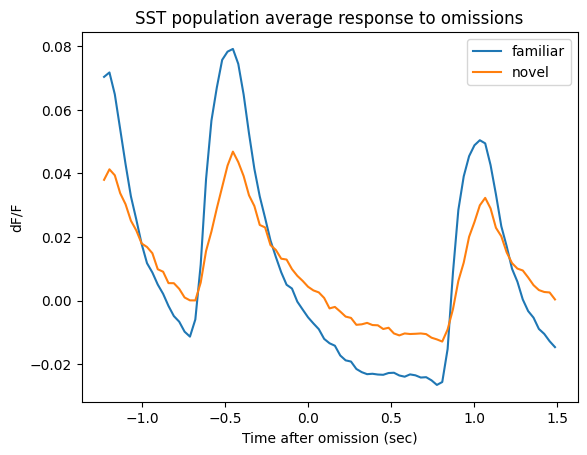

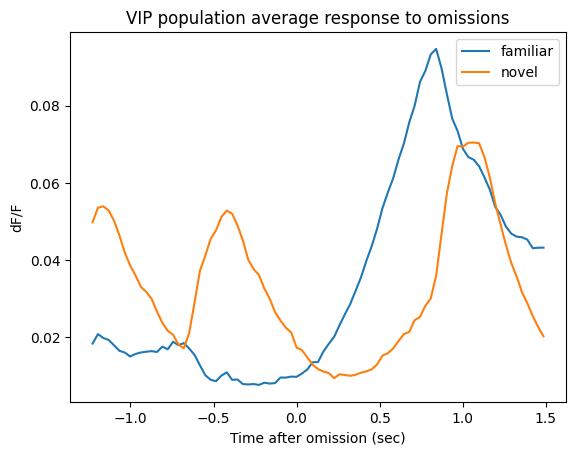

In [3]:
if not os.path.isfile(fname):
    try:
        r = requests.get(url)
        r.raise_for_status()
        with open(fname, "wb") as fid:
            fid.write(r.content)
    except requests.RequestException as e:
        print(f"Error downloading the dataset: {e}")

# Load the dataset
data = pd.read_parquet(fname)

# Filter data for SST and VIP neurons
sst_data = data[data.cre_line == 'Sst-IRES-Cre']
vip_data = data[data.cre_line == 'Vip-IRES-Cre']

# Further filter to get trials where the image was omitted
sst_omitted_data = sst_data[sst_data.omitted == True]
vip_omitted_data = vip_data[vip_data.omitted == True]

# Function to plot population average response
def plot_population_average_omission(neuron_data, title):
    timestamps = neuron_data.trace_timestamps.values[0]
    for exposure_level in neuron_data.exposure_level.unique():
        traces = np.stack(neuron_data[neuron_data.exposure_level == exposure_level].trace.values)
        plt.plot(timestamps, np.mean(traces, axis=0), label=exposure_level)
    plt.title(title)
    plt.xlabel('Time after omission (sec)')
    plt.ylabel('dF/F')
    plt.legend()
    plt.show()

# Plot SST population average response for omissions in familiar and novel sessions
plot_population_average_omission(sst_omitted_data, 'SST population average response to omissions')

# Plot VIP population average response for omissions in familiar and novel sessions
plot_population_average_omission(vip_omitted_data, 'VIP population average response to omissions')